# Mask Detection
Project in Deep Learning in Vision  
Authors: Fabian Trottmann, Stefan Habermacher, Andy Gubser  
Supervisor: Prof. Dr. Mirko Birbaumer

Follow this project on https://github.com/andygubser/mask_detection


## Motivation

The coronavirus pandemic has dramatically affected our lives. Combined with other preventive measueres, face masks help slow the spread of the virus. Thus, in many countries around the globe, wearing masks are mandatory in public and crowded places. However, not all people are obeying the laws. 

This project aims to identify wheater people wear masked or not. Further, the project can tell if people war the mask incorrect. We have downloaded annotated image files are used from https://www.kaggle.com/andrewmvd/face-mask-detection and uploaded them to our Google Drive. 


## Preperation steps

### Settings
- mount Google Drive
- clone mask RCNN repository used for model building
- install the requirements

In [2]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# clone mask RCNN repository used for model building
!git clone https://github.com/matterport/Mask_RCNN.git

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
fatal: could not create work tree dir 'Mask_RCNN': Transport endpoint is not connected


In [3]:
# install the requirements
import os
os.chdir('/content/drive/MyDrive/DeepLearningInVision/Mask_RCNN')
!pip3 install -r requirements.txt
!python3 setup.py install 

     |████████████████████████████████| 163kB 5.8MB/s 
     |████████████████████████████████| 204kB 18.8MB/s 
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/visualize.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/__init__.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/parallel_model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/config.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/utils.py

In [ ]:
pip show mask-rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages/mask_rcnn-2.1-py3.6.egg
Requires: 
Required-by: 


### Build the Metadata Extractor
Annotations are available in XML format. The following classes are used as data object to represent the extracted relevant xml data.

In [4]:
class Image:
    def __init__(self, absoluteFileName, width, height, depth, maskObjects):
        self.__maskObjects = maskObjects
        self.__absoluteFileName = absoluteFileName
        self.__size = [width, height]
    
    def allBoxesWithLabel(self):
        return [[maskObject.boxcoords(), maskObject.label()] 
                for maskObject in self.maskObjects()]
    
    def maskObjects(self):
        return self.__maskObjects
    def absoluteFilename(self):
        return self.__absoluteFileName
    def size(self):
        return self.__size
    def numberOfMasks(self):
        return len(self.__maskObjects)

class MaskObject:
    def __init__(self, label, xmin, ymin, xmax, ymax):
        self.__label = label
        self.__xmin = xmin
        self.__ymin = ymin
        self.__xmax = xmax
        self.__ymax = ymax
    def boxcoords(self):
        return [self.__xmin, self.__ymin, self.__xmax, self.__ymax]
    def label(self):
        return self.__label

In [5]:
import xml.etree.ElementTree as ElementTree
import os.path

class MetadataExtractor:
    file_prefix = "maksssksksss" 
    
    def __init__(self, basepath):
        self.__basepath = basepath
        self.__annotationBase = os.path.join(basepath, 'annotations')
        self.__imageBase = os.path.join(basepath, 'images')
    
    def getImagesBasePath(self):
        return self.__imageBase
    
    def getAbsoluteImagePathById(self, image_id):
        imageFileName = "{0}{1}.png".format(self.file_prefix, image_id)
        return os.path.join(self.__imageBase, imageFileName)
    
    def getAbsoluteAnnotationPathById(self, image_id):
        annotationFileName = "{0}{1}.xml".format(self.file_prefix, image_id)
        return os.path.join(self.__annotationBase, annotationFileName)
        
    def getImageMetadata(self, image_id):
        absPath = self.getAbsoluteAnnotationPathById(image_id)
        image = None
        if absPath == None:
          return image
        
        tree = ElementTree.parse(self.getAbsoluteAnnotationPathById(image_id))
        root = tree.getroot()
        maskObjects = []
        for obj in root.findall('.//object'):
            label = obj.find('name').text
            box = obj.find('bndbox')
            xmin = int(box.find('xmin').text)
            ymin = int(box.find('ymin').text)
            xmax = int(box.find('xmax').text)
            ymax = int(box.find('ymax').text)
            maskObject = MaskObject(label, xmin, ymin, xmax, ymax)
            maskObjects.append(maskObject)
        filename = root.find('filename').text
        size = root.find('size')
        width = int(size.find('width').text)
        height = int(size.find('height').text)
        depth = int(size.find('depth').text)
        filename = root.find('filename').text
        absoluteFilename = os.path.join(self.__imageBase, filename)
        image = Image(absoluteFilename, width, height, depth, maskObjects)
        return image   

To make sure that the extractor works, the extraction is tested:

In [6]:
basepath = '/content/drive/MyDrive/DeepLearningInVision/Data'
extractor = MetadataExtractor(basepath)
imageMetadata = extractor.getImageMetadata('7')

print(imageMetadata.absoluteFilename())
print("size:")
print(imageMetadata.size())

boxesWithLabel = imageMetadata.allBoxesWithLabel()

print(boxesWithLabel[0][1])
for i in range(len(boxesWithLabel)):
    box = boxesWithLabel[i]
    label = boxesWithLabel[i]
    print("box: {0}".format(box))
    print("label: {0}".format(label))

/content/drive/MyDrive/DeepLearningInVision/Data/images/maksssksksss7.png
size:
[400, 300]
with_mask
box: [[253, 116, 342, 210], 'with_mask']
label: [[253, 116, 342, 210], 'with_mask']
box: [[152, 96, 222, 174], 'with_mask']
label: [[152, 96, 222, 174], 'with_mask']
box: [[120, 134, 173, 194], 'with_mask']
label: [[120, 134, 173, 194], 'with_mask']
box: [[118, 66, 135, 90], 'without_mask']
label: [[118, 66, 135, 90], 'without_mask']


## Prepare and Load the Dataset
Create DataSet which inherits from Mask R-CNN Dataset

In [7]:
%tensorflow_version 1.x
from mrcnn import utils
import os
import sys
import math
import random
import cv2
from numpy import zeros
from numpy import asarray

class OxygenMaskDataset(utils.Dataset):
    classNameMask = "with_mask"
    classNameNoMask = "without_mask"
    classNameWearedIncorrect = "mask_weared_incorrect"
    basepath = '/content/drive/MyDrive/DeepLearningInVision/Data'
    extractor = MetadataExtractor(basepath)

    def load_dataset(self, is_train=True):
        self.add_class("dataset", 1, self.classNameMask)
        self.add_class("dataset", 2, self.classNameNoMask)
        images_dir = self.extractor.getImagesBasePath()
        precentage_train = 0.7
        maxItems = len(os.listdir(images_dir))
        print('number of photos', maxItems)
        numberOfImagesTrain = int(maxItems * precentage_train)
        print("number of image train: ", numberOfImagesTrain)
        print("is_train", is_train)
        for image_id in range(maxItems):
            if is_train and (image_id >= numberOfImagesTrain):
                continue
            if (not is_train) and (image_id < numberOfImagesTrain):
                continue
            
            ann_path = self.extractor.getAbsoluteAnnotationPathById(image_id)
            img_path = self.extractor.getAbsoluteImagePathById(image_id)            
            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
            
    def load_mask(self, image_id):
        info = self.image_info[image_id]
        image_id = info['id']
        imageMetadata = self.extractor.getImageMetadata(image_id)        
        boxesWithLabel = imageMetadata.allBoxesWithLabel()
        size = imageMetadata.size()
        w = size[0]
        h = size[1]        
        # create one array for all masks, each on a different channel
        masks = zeros([h, w, len(boxesWithLabel)], dtype='uint8')
        # create masks
        class_ids = list()
        
        for i in range(len(boxesWithLabel)):
            box = boxesWithLabel[i][0]
            label = boxesWithLabel[i][1]
            if label == 'with_mask':
                row_s, row_e = box[1], box[3]
                col_s, col_e = box[0], box[2]
                masks[row_s:row_e, col_s:col_e, i] = 1
                class_ids.append(self.class_names.index(self.classNameMask))
            if label == 'without_mask':
                row_s, row_e = box[1], box[3]
                col_s, col_e = box[0], box[2]
                masks[row_s:row_e, col_s:col_e, i] = 2
                class_ids.append(self.class_names.index(self.classNameNoMask))
            if label == 'mask_weared_incorrect':
                row_s, row_e = box[1], box[3]
                col_s, col_e = box[0], box[2]
                masks[row_s:row_e, col_s:col_e, i] = 1
                class_ids.append(self.class_names.index(self.classNameMask))
        return masks, asarray(class_ids, dtype='int32')
    
    # load an image reference
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

TensorFlow 1.x selected.


In the next section, the drawn images are displayed with their corresponding boxes which are retrieved from the annotation XML files. This gives feedback, whether the previous implementation is working or not.

number of photos 853
number of image train:  597
is_train True


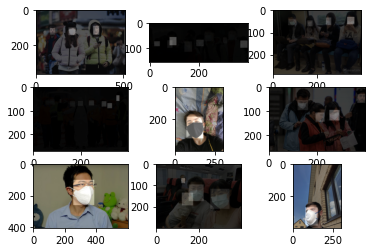

In [8]:
from matplotlib import pyplot

train_set = OxygenMaskDataset()
train_set.load_dataset(is_train=True)
train_set.prepare()
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    image = train_set.load_image(i)
    pyplot.imshow(image)
    # plot all masks
    mask, _ = train_set.load_mask(i)
    for j in range(mask.shape[2]):
        pyplot.imshow(mask[:, :, j], cmap='gray', alpha=0.3)
# show the figure
pyplot.show()

## Data Analysis
The image data are labelled either as "with_mask", "without_mask" or "mask_weared incorrect". 

Images 853
Objects 4072
mask_weared_incorrect 123
with_mask 3232
without_mask 717
files with min 1 object masked weared incorrect 97
[3, 9, 4, 9, 1, 4, 1, 4, 1, 2, 1, 16, 13, 6, 1, 2, 1, 1, 2, 6, 1, 5, 1, 1, 1, 1, 2, 1, 1, 3, 7, 2, 2, 1, 8, 2, 9, 1, 2, 2, 4, 9, 6, 2, 4, 3, 10, 1, 1, 8, 2, 1, 51, 3, 4, 1, 1, 1, 13, 5, 1, 13, 1, 1, 11, 3, 1, 4, 1, 1, 5, 6, 1, 3, 26, 13, 4, 3, 1, 5, 1, 3, 6, 3, 3, 1, 4, 1, 1, 29, 8, 5, 8, 9, 6, 1, 4, 1, 4, 3, 3, 1, 1, 4, 8, 9, 1, 1, 5, 1, 26, 12, 1, 4, 2, 9, 5, 1, 2, 7, 1, 7, 1, 2, 5, 1, 3, 1, 1, 3, 4, 8, 1, 1, 7, 2, 1, 6, 3, 19, 2, 2, 1, 1, 3, 3, 2, 4, 6, 6, 1, 10, 7, 2, 1, 4, 13, 8, 14, 12, 2, 1, 1, 2, 9, 2, 6, 4, 5, 1, 1, 1, 1, 2, 4, 2, 11, 2, 3, 4, 1, 3, 2, 4, 10, 4, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 5, 3, 10, 6, 4, 7, 1, 8, 4, 2, 14, 1, 1, 1, 1, 7, 2, 5, 1, 1, 2, 1, 10, 17, 14, 1, 1, 1, 12, 1, 14, 5, 15, 5, 1, 5, 4, 1, 2, 10, 1, 61, 1, 1, 1, 3, 7, 4, 13, 1, 3, 5, 24, 1, 10, 7, 19, 13, 8, 1, 1, 53, 6, 1, 3, 7, 6, 1, 4, 4, 2, 6, 1, 1, 1, 1, 1, 2, 

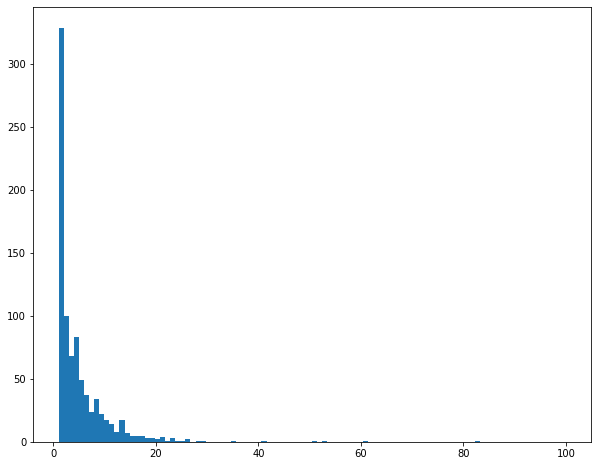

In [9]:
import matplotlib.pyplot as plt
import copy
basepath = '/content/drive/MyDrive/DeepLearningInVision/Data'
extractor = MetadataExtractor(basepath)
images_dir = extractor.getImagesBasePath()
numberOfImagesWithOneIncorrect = 0
numberOfObjectsIncorrect = 0
numberOfObjects_With_Mask = 0
numberOfObjects_Without_Mask = 0
classIncorrect = "mask_weared_incorrect"
classWith = "with_mask"
classWithout = "without_mask"
image_counter = 0
object_counter = 0
hist_data = []
table = {}

for i in range(len(os.listdir(images_dir))):
    metadata = extractor.getImageMetadata(i)
    if metadata == None:
      continue
    labels = [m.label() for m in metadata.maskObjects()]
    image_counter += 1
    hist_data.append(len(labels))
    if classIncorrect in labels:
        numberOfImagesWithOneIncorrect += 1
    for i in metadata.maskObjects():
        object_counter += 1
        if i.label() == classIncorrect:
          numberOfObjectsIncorrect += 1
        if i.label() == classWith:
          numberOfObjects_With_Mask += 1
        if i.label() == classWithout:
          numberOfObjects_Without_Mask += 1
print("Images", image_counter)
print("Objects", object_counter)
print(classIncorrect, numberOfObjectsIncorrect)
print(classWith, numberOfObjects_With_Mask)
print(classWithout, numberOfObjects_Without_Mask)
print("files with min 1 object masked weared incorrect", numberOfImagesWithOneIncorrect)        


plt.subplots(figsize = (10, 8))
plt.hist(hist_data, bins=100, range=[1, 100])
print(hist_data)
table_data = copy.deepcopy(hist_data)



print(max(table_data))
for i in range(1,max(table_data)+1):
  counter = 0 
  for val in table_data:
    if val  == i:
      counter += 1
  if counter > 0:
    table[i] = [counter, str(round((counter / image_counter) * 100, 2)) + ' %', counter * i ,str(round(((i * counter) / object_counter) * 100, 2)) + '% ' ]




In [10]:
#Table Overview
print('-------------------------------------------------------------')
print('Objects/Pic  |NoOf Pictures|% Pcitures|NoOf Objects|% Objects')
for key, val in table.items():
    print('{:<13}|{:<13}|{:<10}|{:<12}|{:<5}'.format(key, val[0], val[1], val[2], val[3]))
print('-------------------------------------------------------------')

-------------------------------------------------------------
Objects/Pic  |NoOf Pictures|% Pcitures|NoOf Objects|% Objects
1            |329          |38.57 %   |329         |8.08% 
2            |100          |11.72 %   |200         |4.91% 
3            |68           |7.97 %    |204         |5.01% 
4            |83           |9.73 %    |332         |8.15% 
5            |49           |5.74 %    |245         |6.02% 
6            |37           |4.34 %    |222         |5.45% 
7            |24           |2.81 %    |168         |4.13% 
8            |34           |3.99 %    |272         |6.68% 
9            |22           |2.58 %    |198         |4.86% 
10           |17           |1.99 %    |170         |4.17% 
11           |14           |1.64 %    |154         |3.78% 
12           |8            |0.94 %    |96          |2.36% 
13           |17           |1.99 %    |221         |5.43% 
14           |7            |0.82 %    |98          |2.41% 
15           |5            |0.59 %    |75         

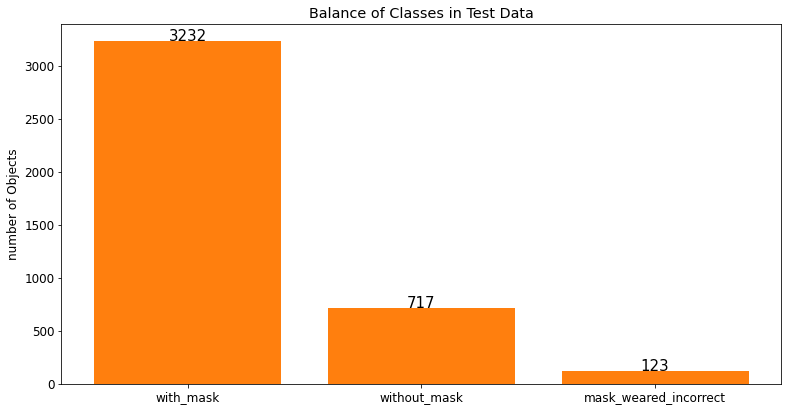

In [11]:

import numpy as np
plt.rcParams.update({'font.size': 12})
labels = ["with_mask", "without_mask", "mask_weared_incorrect"]
data = [3232, 717, 123]

ind = np.arange(len(labels))

fig, ax = plt.subplots(figsize = (10, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(ind, data, width=0.4)
ax.set_title('Balance of Classes in Test Data')
ax.set_ylabel('number of Objects')

ax.bar(labels, data)
for index, d in enumerate(data):
    plt.text(x=index, y = d, s=f"{d}", fontdict=dict(fontsize=15), ha='center')

plt.show()

This plot shows the number of persons not wearing masks, wear them correctly or incorrectly. There are 3'232 and therefore far more persons wearing masks correctly than persons wearing not correctly (123) or not them wearing at all (717).  

To predict always the most frequent class would get a reasonably good accuracy, but this would be meaningless. Therefore it would be better to calculate  accuracies on all categories versus all remaining categories as binary classification task and averaging these. This is called unweighted accuracy.



## Split the dataset into train and test set

The train / test set is prepared. As we have seen before in the OxygenMaskDataset class, the model will be trained with 70% of data and validated with 30% of data.

In [12]:
# train set
train_set = OxygenMaskDataset()
train_set.load_dataset(is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))


# test/val set
test_set = OxygenMaskDataset()
test_set.load_dataset(is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))


number of photos 853
number of image train:  597
is_train True
Train: 597
number of photos 853
number of image train:  597
is_train False
Test: 256


## Train the model
We do transfer learning and therefore load a pretrained model and train the top layers of our new dataset in order to predict new object classes.

First we create a inherit from mrcnn.config.Config in order to create our Configuration for training the model:

In [13]:
%tensorflow_version 1.x
from mrcnn.config import Config
from mrcnn.model import MaskRCNN

class OxygenMaskConfig(Config):
    NAME = "oxygenmask_cfg"
    NUM_CLASSES = 1 + 3 #background + with_mask, without_mask
    STEPS_PER_EPOCH = 130

Using TensorFlow backend.


In [ ]:
# prepare config
config = OxygenMaskConfig()
config.display()
# define the model
model = MaskRCNN(mode='training', model_dir='./', config=config)
model.keras_model.metrics_tensors = []
# load weights (mscoco)
model.load_weights('/content/drive/MyDrive/DeepLearningInVision/mask_rcnn_coco.h5', by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
# train weights (output layers or 'heads')
print(config.LEARNING_RATE)
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=5, layers='heads')


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                16
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Validate the models
In the next part, the actual vs. predicted objects are plotted and also the mean Average Precision (mAP) will be calculated. It shows how congruent the model is relative to the ground truth.

In [14]:
import mrcnn.model as modellib
import numpy as np

# calculate the mAP for a model on a given dataset
def evaluate_model(dataset, model, config):
  APs = list()
  for image_id in dataset.image_ids:
    # load image and ground truth bounding boxes (masks for the image id)
    image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
    # convert pixel values (e.g. center)
    scaled_image = modellib.mold_image(image, config)
    # convert image into one sample
    sample = np.expand_dims(scaled_image, 0)
    # make prediction
    yhat = model.detect(sample, verbose=0)
    # extract results for first sample
    r = yhat[0]
    # calculate statistics, including AP
    AP, _, _, _ = utils.compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
    # store
    APs.append(AP)
    # calculate the mean AP across all images
    mAP = np.mean(APs)
  return mAP


PredictionConfig, inherited from mrcnn.config.Config will be created.

In [15]:
%tensorflow_version 1.x
from mrcnn.config import Config
from mrcnn.model import MaskRCNN

class PredictionConfig(Config):
      NAME = "oxygenmask_cfg"
      NUM_CLASSES = 1 + 3 #background + with_mask, without_mask
      STEPS_PER_EPOCH = 131
      GPU_COUNT = 1
      IMAGES_PER_GPU = 1

In contrast to the model training, we initialize our model in order to do inference and load our just trained model.

In [ ]:
onlyShowAccuracyOfLastEpoch = True
epochs = 5
modelName = "70_30_3_class"
config = PredictionConfig()
model = MaskRCNN(mode='inference', model_dir='./', config=config)
model.keras_model.metrics_tensors = []
print("-------------------")
print("Model: ", modelName)
for i in range(1, epochs + 1):
  if onlyShowAccuracyOfLastEpoch:
    if i != epochs:
      continue
  print("epoch: ", i)
  fileName = '{0}.h5'.format(i)
  model.load_weights('/content/drive/MyDrive/DeepLearningInVision/model/{0}/{1}'.format(modelName, fileName), by_name=True)
  test_mAP = evaluate_model(test_set, model, config)
  print("Test mAP: %.3f" % test_mAP)

-------------------
Model:  70_30_3_class
epoch:  5
Test mAP: 0.858


In [16]:
onlyShowAccuracyOfLastEpoch = True
epochs = 5
modelName = "80_20_3_class"
config = PredictionConfig()
model = MaskRCNN(mode='inference', model_dir='./', config=config)
model.keras_model.metrics_tensors = []
print("-------------------")
print("Model: ", modelName)
for i in range(1, epochs + 1):
  if onlyShowAccuracyOfLastEpoch:
    if i != epochs:
      continue
  print("epoch: ", i)
  fileName = '{0}.h5'.format(i)
  model.load_weights('/content/drive/MyDrive/DeepLearningInVision/model/{0}/{1}'.format(modelName, fileName), by_name=True)
  test_mAP = evaluate_model(test_set, model, config)
  print("Test mAP: %.3f" % test_mAP)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
f2
4
-------------------
Model:  80_20_3_class
epoch:  5

Test mAP: 0.843


In [17]:
%tensorflow_version 1.x
from mrcnn.config import Config
from mrcnn.model import MaskRCNN

class PredictionConfig(Config):
      NAME = "oxygenmask_cfg"
      NUM_CLASSES = 1 + 2 #background + with_mask, without_mask
      STEPS_PER_EPOCH = 130
      GPU_COUNT = 1
      IMAGES_PER_GPU = 1

In [18]:
onlyShowAccuracyOfLastEpoch = True
epochs = 5
modelName = "70_30_2_class"
config = PredictionConfig()
model = MaskRCNN(mode='inference', model_dir='./', config=config)
model.keras_model.metrics_tensors = []
print("-------------------")
print("Model: ", modelName)
for i in range(1, epochs + 1):
  if onlyShowAccuracyOfLastEpoch:
    if i != epochs:
      continue
  print("epoch: ", i)
  fileName = '{0}.h5'.format(i)
  model.load_weights('/content/drive/MyDrive/DeepLearningInVision/model/{0}/{1}'.format(modelName, fileName), by_name=True)
  test_mAP = evaluate_model(test_set, model, config)
  print("Test mAP: %.3f" % test_mAP)

-------------------
Model:  70_30_2_class
epoch:  5
Test mAP: 0.861


We plot the images with object boxes from the annotations file (the ground truth) vs. the prediction

number of photos 853
number of image train:  597
is_train True


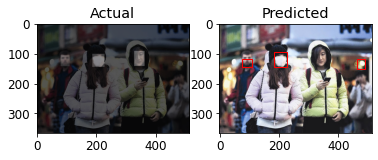

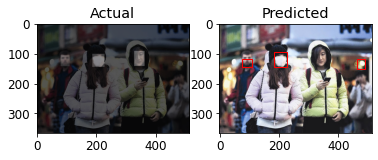

In [23]:
import mrcnn.model as modellib
import numpy as np
from matplotlib import pyplot
from matplotlib.patches import Rectangle

%tensorflow_version 1.x
from mrcnn.config import Config
from mrcnn.model import MaskRCNN

class PredictionConfig(Config):
      NAME = "oxygenmask_cfg"
      NUM_CLASSES = 1 + 3 #background + with_mask, without_mask
      STEPS_PER_EPOCH = 131
      GPU_COUNT = 1
      IMAGES_PER_GPU = 1

def plot_actual_vs_predicted(dataset, model, cfg, n_images=5):
	# load image and mask
  for i in range(n_images):
	  # load the image and mask
    image = dataset.load_image(i) 
    mask, _ = dataset.load_mask(i)
	  # convert pixel values (e.g. center)
    scaled_image = modellib.mold_image(image, cfg)
	  # convert image into one sample
    sample = np.expand_dims(scaled_image, 0)
	  # make prediction
    yhat = model.detect(sample, verbose=0)[0]
	  # define subplot
    pyplot.subplot(n_images, 2, i*2+1)
	  # plot raw pixel data
    pyplot.imshow(image)
    pyplot.title('Actual')
	  # plot masks
    for j in range(mask.shape[2]):
      pyplot.imshow(mask[:, :, j], cmap='gray', alpha=0.3)
	  # get the context for drawing boxes
    pyplot.subplot(n_images, 2, i*2+2)
	  # plot raw pixel data
    pyplot.imshow(image)
    pyplot.title('Predicted')
    ax = pyplot.gca()
	  # plot each box
    for i in range(len(yhat['rois'])):
		  # get coordinates
      y1, x1, y2, x2 = yhat['rois'][i]
		  # calculate width and height of the box
      width, height = x2 - x1, y2 - y1
		  # create the shape
      rect = Rectangle((x1, y1), width, height, fill=False, color='red')
		  # draw the box
      ax.add_patch(rect)
  # show the figure
  pyplot.show()
 
# create config
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
# load model weights
model_path = '/content/drive/MyDrive/DeepLearningInVision/model/80_20_3_class/5.h5'
model.load_weights(model_path, by_name=True)
# plot predictions for train dataset
number_of_images = 1
dataset = OxygenMaskDataset()
dataset.load_dataset(is_train=True)
dataset.prepare()

plot_actual_vs_predicted(train_set, model, cfg, number_of_images)
# plot predictions for test dataset
plot_actual_vs_predicted(dataset, model, cfg, number_of_images)

Now the most interesting part: new images are predicted. plot_prediction can be used to pass a base path. The function will plot all images with predictions for each detected object

/content/drive/MyDrive/DeepLearningInVision/Predictions
['/content/drive/MyDrive/DeepLearningInVision/Predictions/woman-wearing-mask.original.jpg', '/content/drive/MyDrive/DeepLearningInVision/Predictions/bezos-final-0404_kompri.png', '/content/drive/MyDrive/DeepLearningInVision/Predictions/incorrect.jpg', '/content/drive/MyDrive/DeepLearningInVision/Predictions/d41586-020-00760-8_17796354.jpg']
/content/drive/MyDrive/DeepLearningInVision/Predictions/woman-wearing-mask.original.jpg


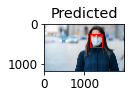

/content/drive/MyDrive/DeepLearningInVision/Predictions/bezos-final-0404_kompri.png


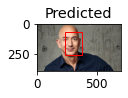

/content/drive/MyDrive/DeepLearningInVision/Predictions/incorrect.jpg


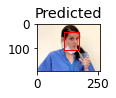

/content/drive/MyDrive/DeepLearningInVision/Predictions/d41586-020-00760-8_17796354.jpg


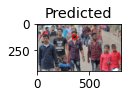

In [25]:
import mrcnn.model as modellib
import numpy as np
from matplotlib import pyplot
from matplotlib.patches import Rectangle
import skimage.io
import os

def imgToArray(absoluteFilePath):
    image = skimage.io.imread(absoluteFilePath)
    # If grayscale. Convert to RGB for consistency.
    if image.ndim != 3:
        image = skimage.color.gray2rgb(image)
        # If has an alpha channel, remove it for consistency
    if image.shape[-1] == 4:
        image = image[..., :3]
    return image

def plot_prediction(imageSourceDir, model, cfg):
    classNameById = { 1:"with_mask", 2:"without_mask", 3:"mask_weared_incorrect" }
    images = [os.path.join(imageSourceDir, fileName) for fileName in os.listdir(imageSourceDir)]
    print(imageSourceDir)
    print(images)
  
    for i in range(len(images)):
        imagePath = images[i]
        print(imagePath)
        image = imgToArray(imagePath)
        # convert pixel values (e.g. center)
        scaled_image = modellib.mold_image(image, cfg)
        # convert image into one sample
        sample = np.expand_dims(scaled_image, 0)
        # make prediction
        yhat = model.detect(sample, verbose=0)[0]
        # define subplot
        # get the context for drawing boxes
        pyplot.subplot(len(images), 2, i*2+2)
        # plot raw pixel data
        pyplot.imshow(image)
        pyplot.title('Predicted')
        ax = pyplot.gca()
        # plot each box
        for i in range(len(yhat['rois'])):
          # get coordinates
          y1, x1, y2, x2 = yhat['rois'][i]
          # calculate width and height of the box
          width, height = x2 - x1, y2 - y1
          # create the shape
          predClassId = int(yhat['class_ids'][i])
          className = classNameById[predClassId]
          rect = Rectangle((x1, y1), width, height, fill=False, color='red')
          # draw the box
          ax.add_patch(rect)
          # show the figure
          pyplot.show()
 
def LoadModel(self):
  cfg = PredictionConfig()
  model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
  model_path = '/content/drive/MyDrive/DeepLearningInVision/model/80_20_3_class/5.h5'
  model.load_weights(model_path, by_name=True)
  return model
  
#model = LoadModel()
imageSourceDir = '/content/drive/MyDrive/DeepLearningInVision/Predictions'

plot_prediction(imageSourceDir, model, cfg)

## Compare the models

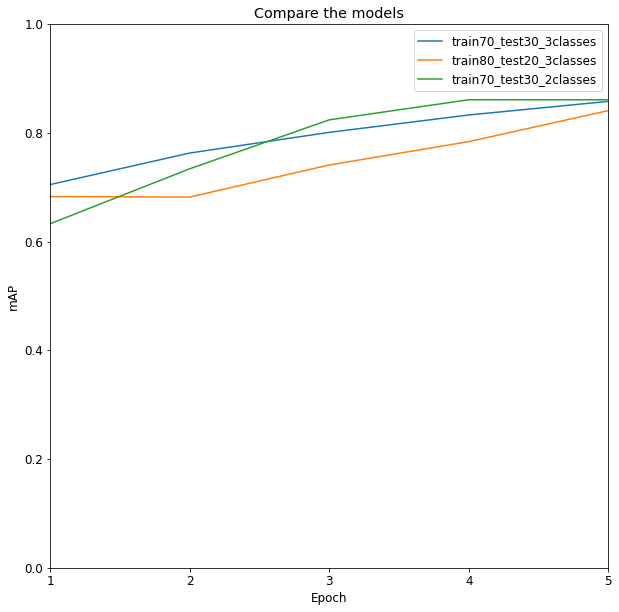

In [ ]:
labels = [1, 2, 3, 4, 5]
map_70_30_3 = [0.705, 0.763, 0.801, 0.833, 0.858]
map_80_20_3 = [0.683, 0.682, 0.741, 0.784, 0.841]
map_70_30_2 = [0.633, 0.734, 0.824, 0.861, 0.861]

fig1,ax1 = plt.subplots(figsize = (10,10))
ax1.plot(labels, map_70_30_3)
ax1.plot(labels, map_80_20_3)
ax1.plot(labels, map_70_30_2)


ax1.set_title('Compare the models')
ax1.set_ylabel('mAP')
ax1.set_xlabel('Epoch')
ax1.set(ylim=(0, 1), xlim=(1, 5))

plt.xticks(labels)
plt.legend(['train70_test30_3classes', 
        'train80_test20_3classes', 
        'train70_test30_2classes'])
plt.show()


### Other validation graphs

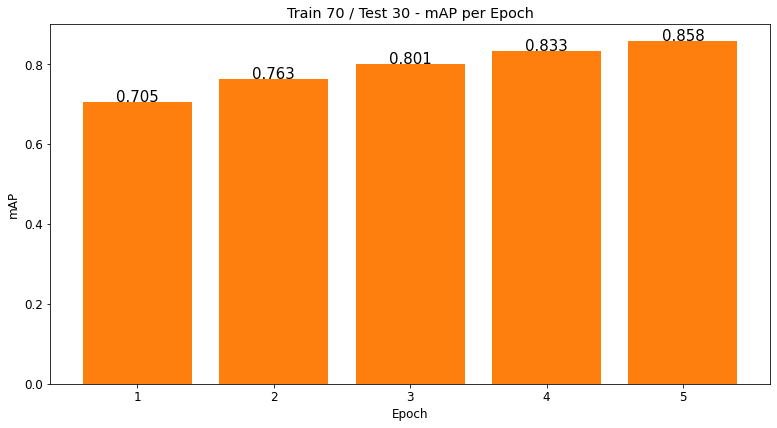

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 12})
labels = [1, 2, 3, 4, 5]
data = [0.705, 0.763, 0.801, 0.833, 0.858]
title = "70_30_3_class"
fig, ax = plt.subplots(figsize = (10, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(labels, data, width=0.4)
ax.set_title('Train 70 / Test 30 - mAP per Epoch')
ax.set_ylabel('mAP')
ax.set_xlabel('Epoch')
ax.bar(labels, data)
for index, d in enumerate(data):
    plt.text(x=index + 1, y = d, s=f"{d}", fontdict=dict(fontsize=15), ha='center')

plt.show()

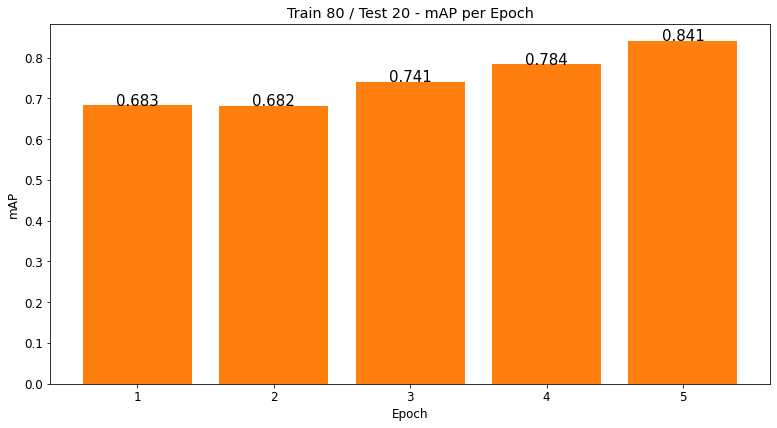

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 12})
labels = [1, 2, 3, 4, 5]
data = [0.683, 0.682, 0.741, 0.784, 0.841]
title = "80_20_3_class"
fig, ax = plt.subplots(figsize = (10, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(labels, data, width=0.4)
ax.set_title('Train 80 / Test 20 - mAP per Epoch')
ax.set_ylabel('mAP')
ax.set_xlabel('Epoch')

ax.bar(labels, data)
for index, d in enumerate(data):
    plt.text(x=index + 1, y = d, s=f"{d}", fontdict=dict(fontsize=15), ha='center')

plt.show()

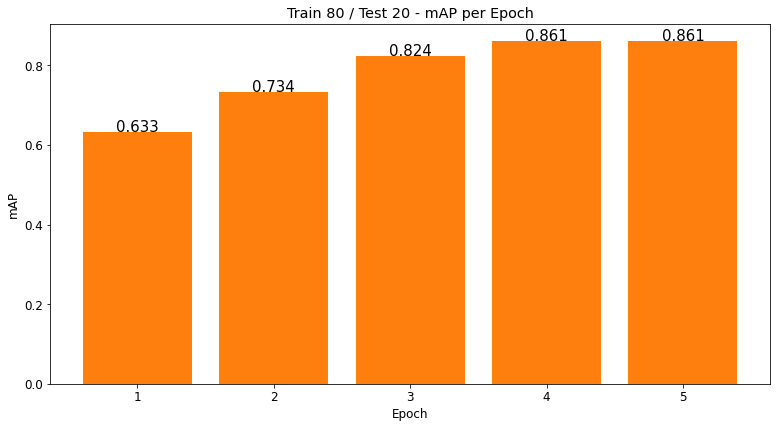

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 12})
labels = [1, 2, 3, 4, 5]
data = [0.633, 0.734, 0.824, 0.861, 0.861]
title = "70_30_2_class"
fig, ax = plt.subplots(figsize = (10, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(labels, data, width=0.4)
ax.set_title('Train 80 / Test 20 - mAP per Epoch')
ax.set_ylabel('mAP')
ax.set_xlabel('Epoch')

ax.bar(labels, data)
for index, d in enumerate(data):
    plt.text(x=index + 1, y = d, s=f"{d}", fontdict=dict(fontsize=15), ha='center')

plt.show()

## Further research
- increase sample sizes by data augmentations**

## References
https://machinelearningmastery.com/how-to-train-an-object-detection-model-with-keras/


https://github.com/matterport/Mask_RCNN